In [6]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sample_data_path = './processed/c1s001/0.pkl'
with open(sample_data_path, 'rb') as f:
    sample = pickle.load(f)

In [7]:
ts = sample['zephyr']['ECG']['Time'][0]
start_t = ts + pd.Timedelta(minutes=1)
end_t = ts + pd.Timedelta(minutes=2)

In [5]:
def find_indices(data, start_t, end_t):
    start_t = pd.to_datetime(start_t)
    end_t = pd.to_datetime(end_t)

    # get the index for the start_t and end_t
    start_idx = 0
    end_idx = 0

    for i in range(len(data['Time'])):
        if data['Time'][i] >= start_t:
            start_idx = i
            break

    for i in range(len(data['Time'])):
        if data['Time'][i] >= end_t:
            end_idx = i
            break
    return start_idx, end_idx

KeyError: 'BR'

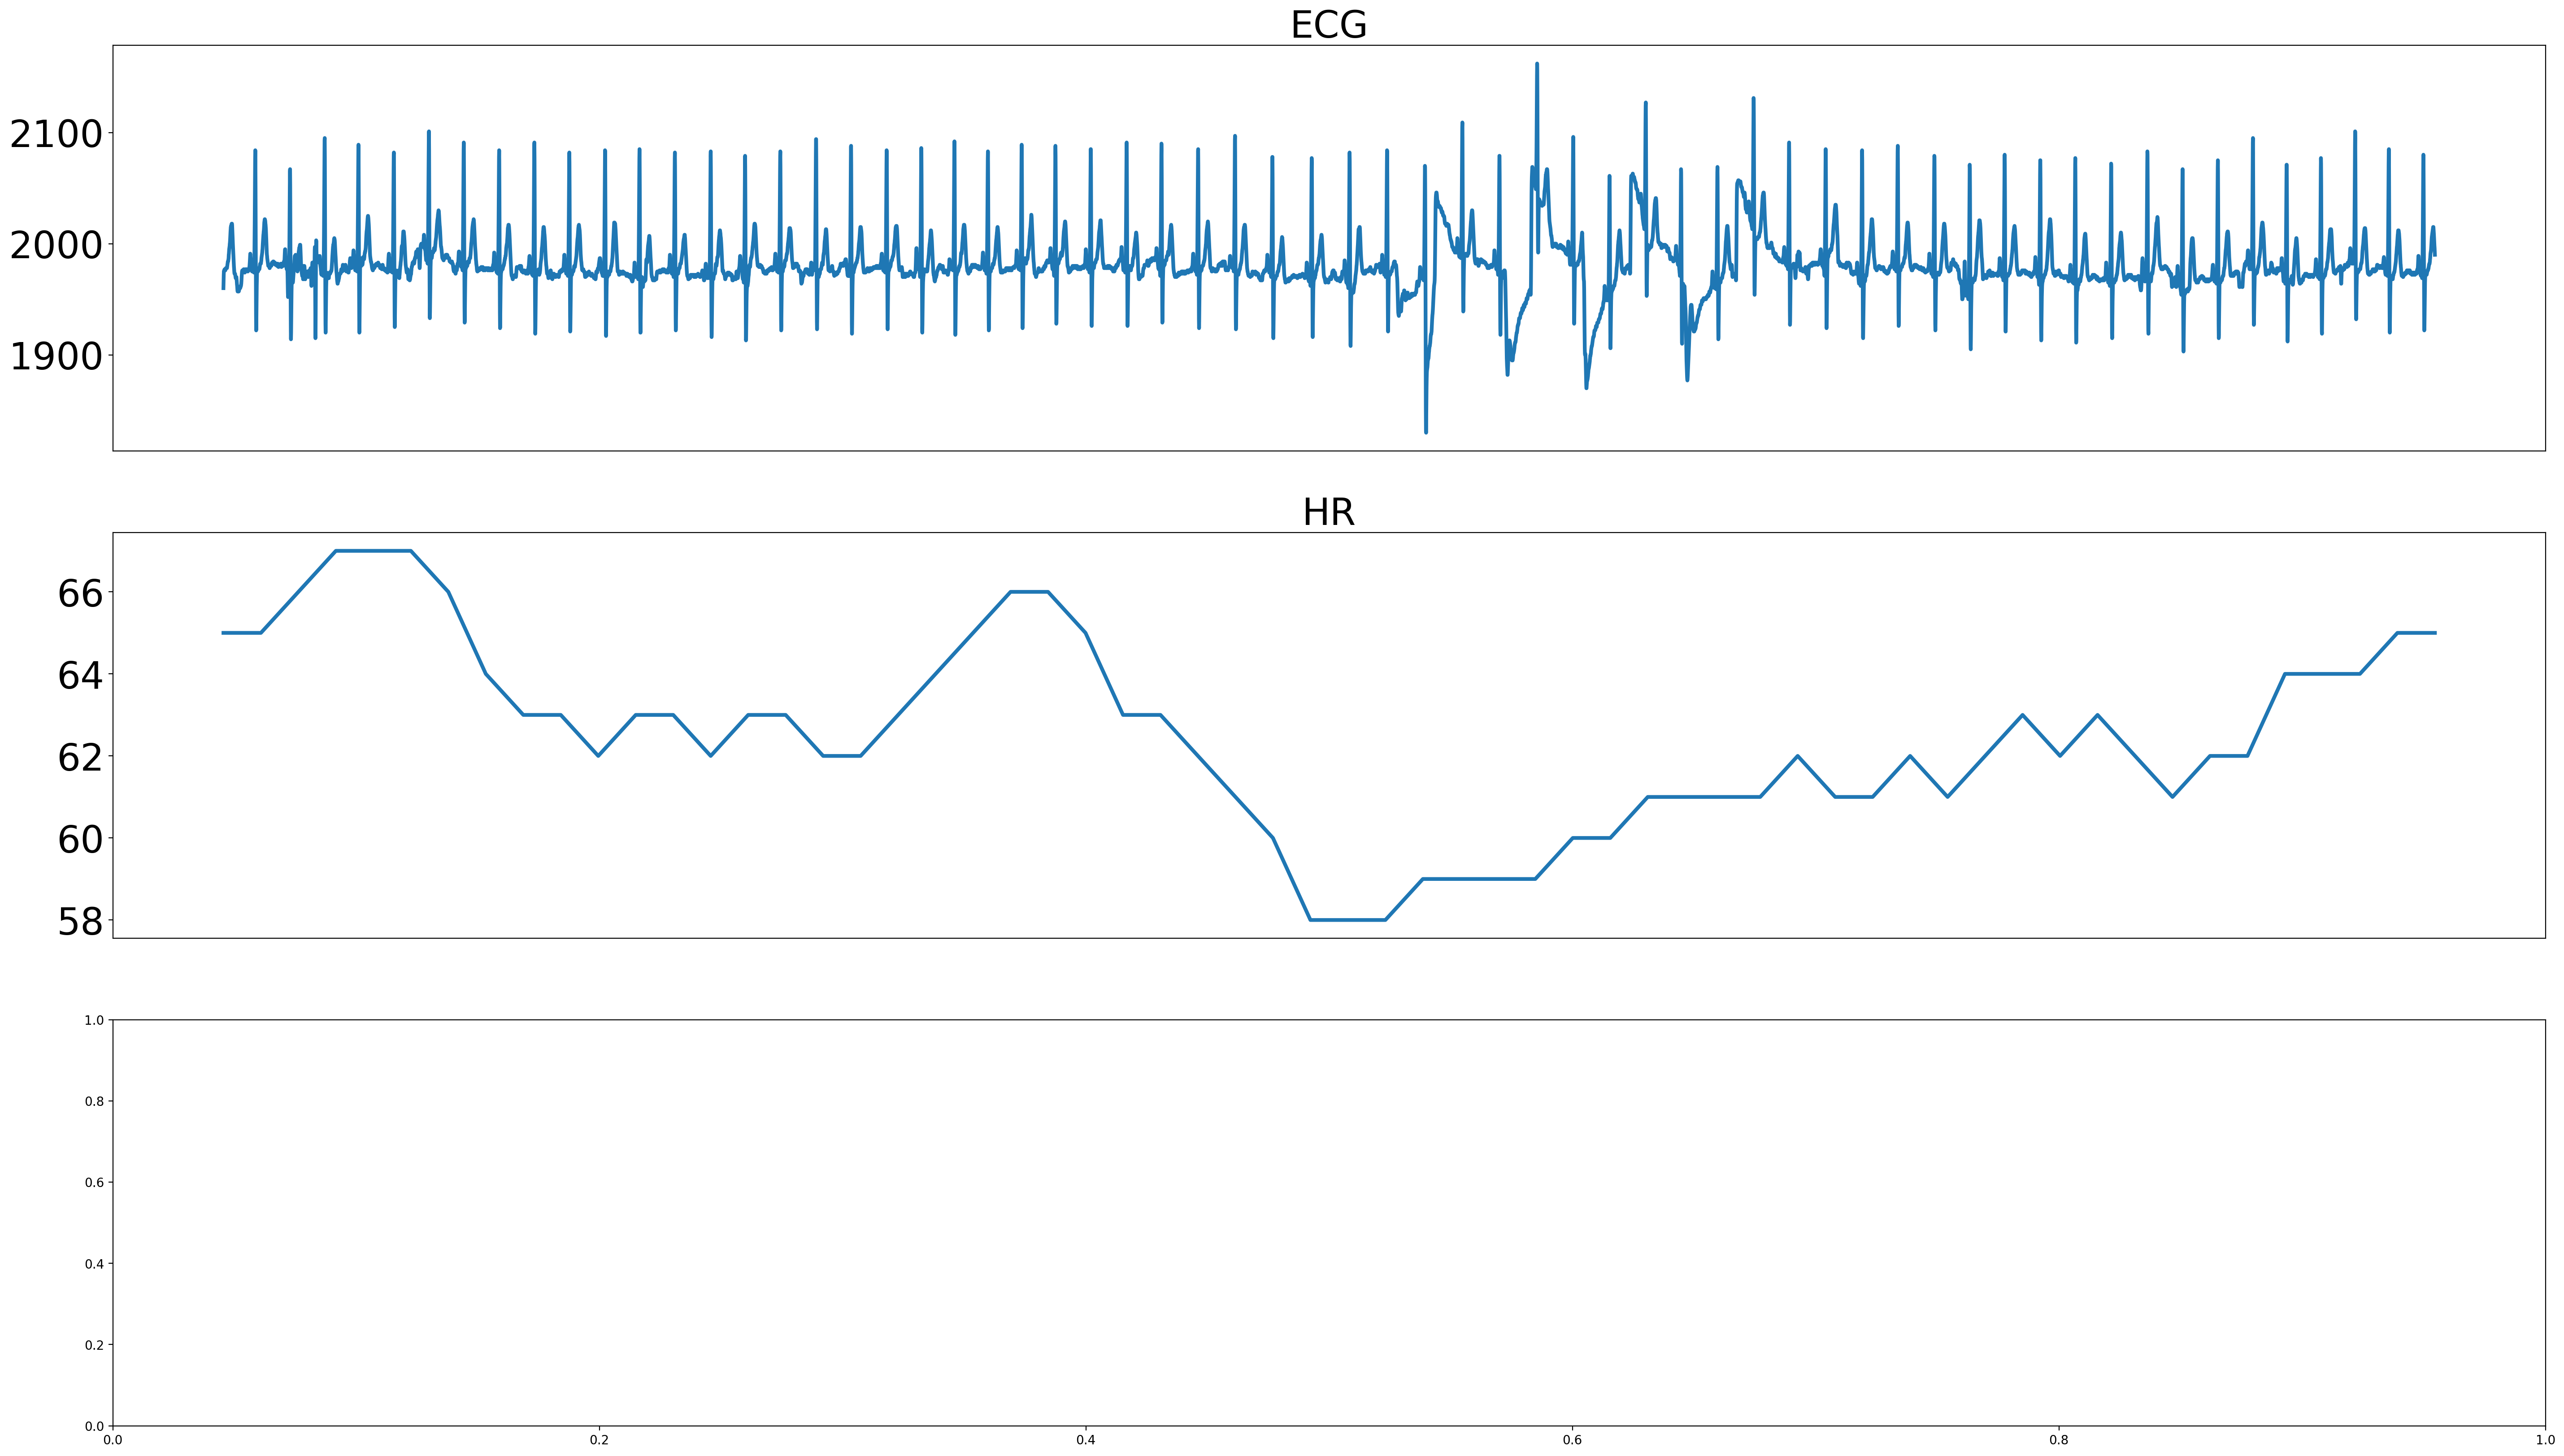

In [ ]:
axis_font_size = 30
fig, ax = plt.subplots(3, 1, figsize=(35, 20), dpi=200)
linewidth = 3

start_idx, end_idx = find_indices(sample['zephyr']['ECG'], start_t, end_t)
ax[0].plot(sample['zephyr']['ECG']['Time'][start_idx:end_idx], sample['zephyr']['ECG']['EcgWaveform'][start_idx:end_idx], linewidth=linewidth)
ax[0].get_xaxis().set_visible(False)
ax[0].tick_params(axis='x', labelsize=axis_font_size)
ax[0].tick_params(axis='y', labelsize=axis_font_size)
ax[0].set_title('ECG', fontsize=axis_font_size)

start_idx, end_idx = find_indices(sample['zephyr']['Summary'], start_t, end_t)
ax[1].plot(sample['zephyr']['Summary']['Time'][start_idx:end_idx], sample['zephyr']['Summary']['HR'][start_idx:end_idx], linewidth=linewidth)
ax[1].get_xaxis().set_visible(False)
ax[1].tick_params(axis='x', labelsize=axis_font_size)
ax[1].tick_params(axis='y', labelsize=axis_font_size)
ax[1].set_title('HR', fontsize=axis_font_size)

print(sample['zephyr']['Summary'])
ax[2].plot(sample['zephyr']['Summary']['Time'][start_idx:end_idx], sample['zephyr']['Summary']['BR'][start_idx:end_idx], linewidth=linewidth)
ax[2].tick_params(axis='x', labelsize=axis_font_size)
ax[2].tick_params(axis='y', labelsize=axis_font_size)
ax[2].set_title('BR', fontsize=axis_font_size)


print('CGM_idx: {}, Glucose: {}'.format(sample['Index'], sample['glucose']))
# plt.suptitle('CGM Timestamp: {}, Glucose: {}'.format(sample['Timestamp'], sample['glucose']), fontsize=axis_font_size)
plt.tight_layout()
plt.show()